In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


In [55]:
df_train = pd.read_csv("D:\Big mart\\notebook\data\\Train.csv")
df_test =pd.read_csv(r"D:\Big mart\\notebook\data\\Test.csv")

In [56]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [57]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [59]:
df_train.shape

(8523, 12)

In [60]:
df_test.shape

(5681, 11)

In [61]:
# Checking duplicated values in the Dataset
df_train.duplicated().sum()

0

In [62]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Weight'>

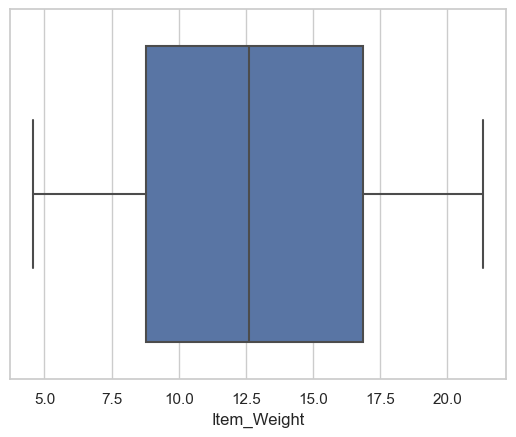

In [64]:
sns.boxplot(x=df_train["Item_Weight"])


In [65]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [66]:
df_train["Outlet_Size"].mode()[0]

'Medium'

In [67]:
df_train["Item_Weight"].mean()

12.857645184136183

In [68]:
#Replacing Mean with null values in Item_Weight because of the No outlier
#Replacing Mode with null values in Outlet_Size because of the categorical variable
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)


In [69]:
#Handling Null values in the Train Dataset
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [70]:
#Note: Target column is not present
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [71]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [72]:
# Handeling Null values in test Dataset
df_test["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
df_test["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Feature Selection

In [73]:
df_train.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1,inplace=True)
df_test.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1,inplace=True)

In [74]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [75]:
numeric_col =df_train.select_dtypes(exclude='object').columns.to_list()
numeric_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

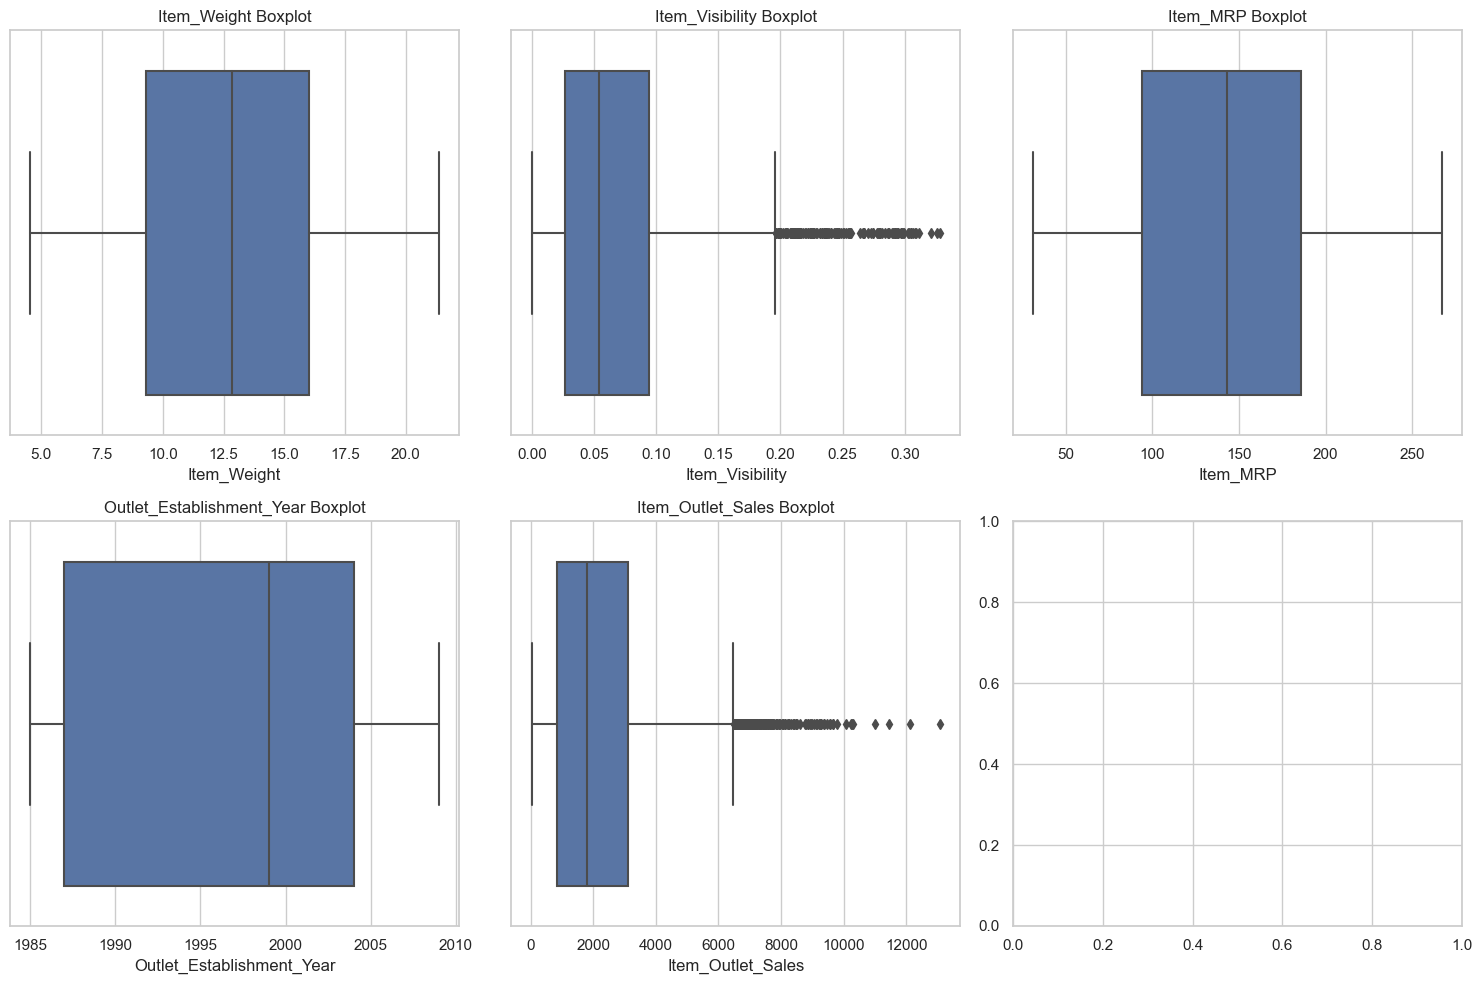

In [76]:
#Setting the grid style in seaborn
sns.set(style="whitegrid")
#Creating Subplot
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
#Flattening the axis for easy iteration
axes = axes.flatten()
for i,col in enumerate(numeric_col):
    sns.boxplot(x=df_train[col],ax=axes[i])
    axes[i].set_title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

### EDA Using dtale

In [77]:
!pip install dtale

  Using cached Werkzeug-2.2.3-py3-none-any.whl (233 kB)
  Using cached Flask-2.2.5-py3-none-any.whl (101 kB)
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.0.1
    Uninstalling Werkzeug-3.0.1:
      Successfully uninstalled Werkzeug-3.0.1
  Attempting uninstall: Flask
    Found existing installation: Flask 3.0.0
    Uninstalling Flask-3.0.0:
      Successfully uninstalled Flask-3.0.0


In [78]:
!pip install --upgrade flask
!pip install --upgrade jinja2

  Using cached flask-3.0.0-py3-none-any.whl (99 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl (226 kB)
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.3
    Uninstalling Werkzeug-2.2.3:
      Successfully uninstalled Werkzeug-2.2.3
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.5
    Uninstalling Flask-2.2.5:
      Successfully uninstalled Flask-2.2.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtale 3.7.0 requires Flask<2.3; python_version >= "3.7", but you have flask 3.0.0 which is incompatible.
dtale 3.7.0 requires werkzeug<2.3; python_version >= "3.7", but you have werkzeug 3.0.1 which is incompatible.


#### Note : QQ plot show normally distrubuted data if it is inline with RED line if not then Not Normally distributed.

In [79]:
import dtale
dtale.show(df_train)

### EDA Using Pandas Profiling

### EDA Using Klib Library

In [80]:
!pip install Klib

GridSpec(6, 5)

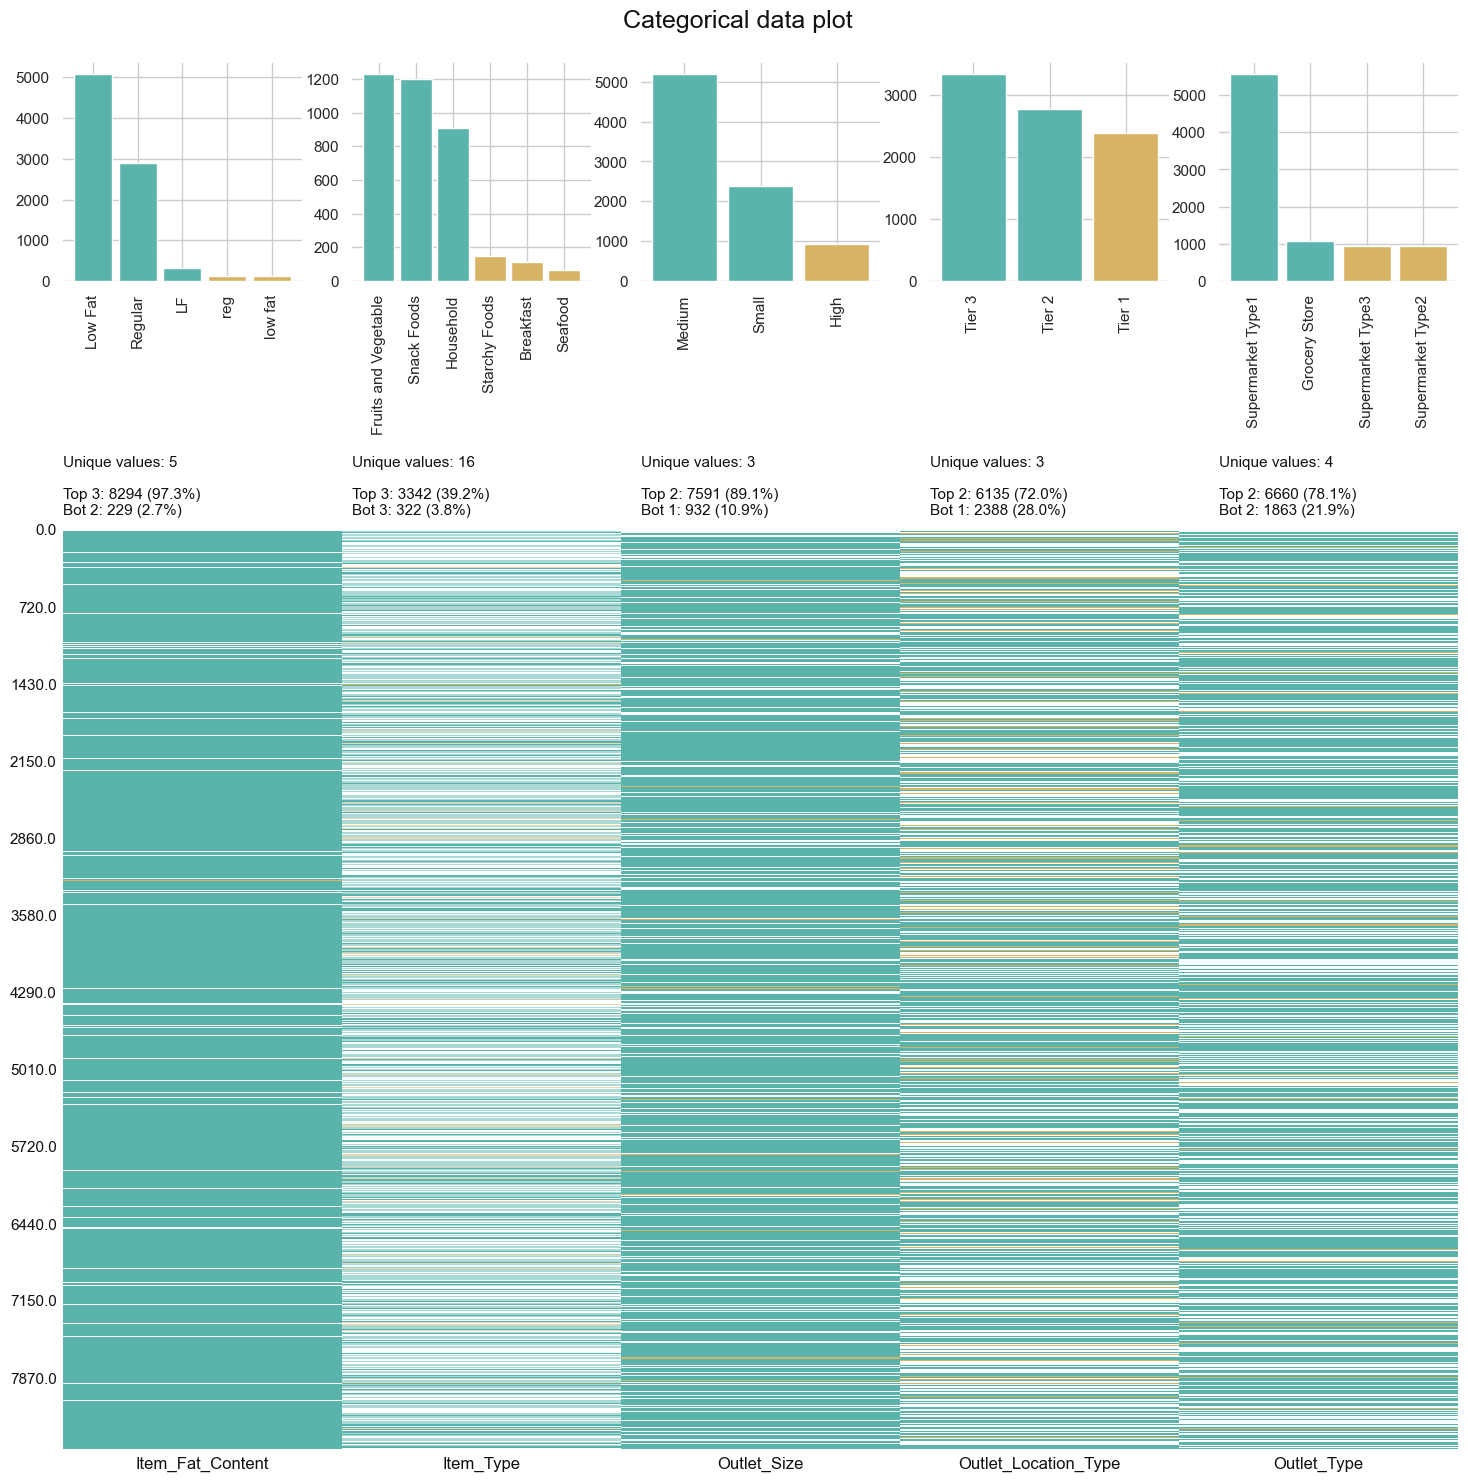

In [81]:
import klib
klib.cat_plot(df_train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

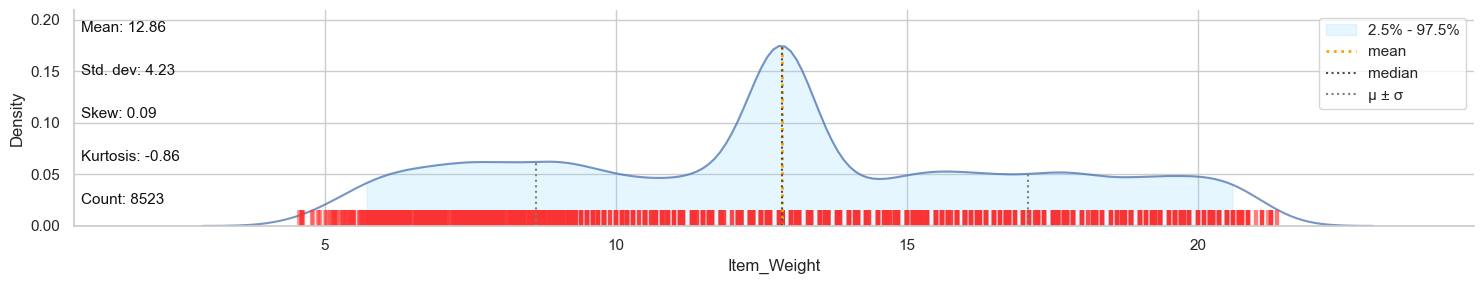

In [85]:
klib.dist_plot(df_train)

In [86]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


### Data cleaning using klib library

In [87]:
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [89]:
# reducing memory (i.e. converting float64 to float32)
df_train = klib.convert_datatypes(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float32 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float32 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float32 
 5   Outlet_Establishment_Year  8523 non-null   int16   
 6   Outlet_Size                8523 non-null   category
 7   Outlet_Location_Type       8523 non-null   category
 8   Outlet_Type                8523 non-null   category
 9   Item_Outlet_Sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


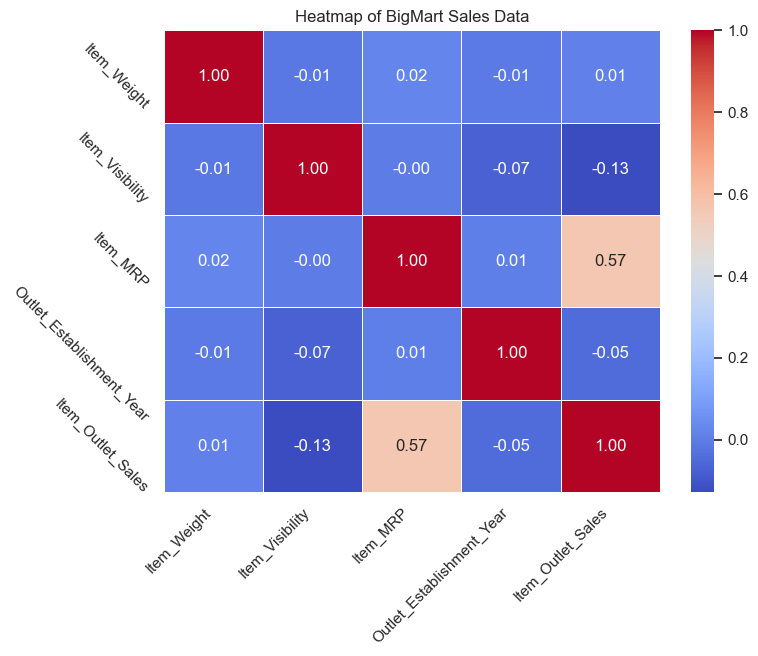

In [84]:
plt.figure(figsize=(8, 6))
heatmap=sns.heatmap(df_train[numeric_col].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=-45, horizontalalignment='right')

plt.title('Heatmap of BigMart Sales Data')
plt.show()

### Preprocessing Task before Model Building

#### Label Encoding

In [98]:
# Applying Label encoding for maintainig the order of the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_col =df_train.select_dtypes(include='category').columns.to_list()
for col in categorical_col:
    df_train[col] = le.fit_transform(df_train[col])
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


#### Dependant and Independent features

In [101]:
X = df_train.drop(columns=["Item_Outlet_Sales"], axis=1)
y = df_train['Item_Outlet_Sales']

In [103]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2
